# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iroquois falls
Processing Record 2 of Set 1 | toora-khem
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | husavik
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | kieta
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | itoman
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | maragogi
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | olinda
Processing Record 15 of Set 1 | kaeo
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | rawson
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | biak
Processing Record 20 of Set 1 | logstor
Processing Record 21 of Set 1 | lukovetskiy
Processing Record 22 of Set 1 | saint comb

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iroquois falls,48.7669,-80.6831,1.04,96,95,5.66,CA,1676396007
1,toora-khem,52.4675,96.1100,-18.70,99,97,1.17,RU,1676396007
2,bathsheba,13.2167,-59.5167,28.34,69,40,9.26,BB,1676396008
3,husavik,66.0449,-17.3389,2.64,80,100,3.85,IS,1676396008
4,albany,42.6001,-73.9662,8.69,47,5,2.24,US,1676396008


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iroquois falls,48.7669,-80.6831,1.04,96,95,5.66,CA,1676396007
1,toora-khem,52.4675,96.1100,-18.70,99,97,1.17,RU,1676396007
2,bathsheba,13.2167,-59.5167,28.34,69,40,9.26,BB,1676396008
3,husavik,66.0449,-17.3389,2.64,80,100,3.85,IS,1676396008
4,albany,42.6001,-73.9662,8.69,47,5,2.24,US,1676396008


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

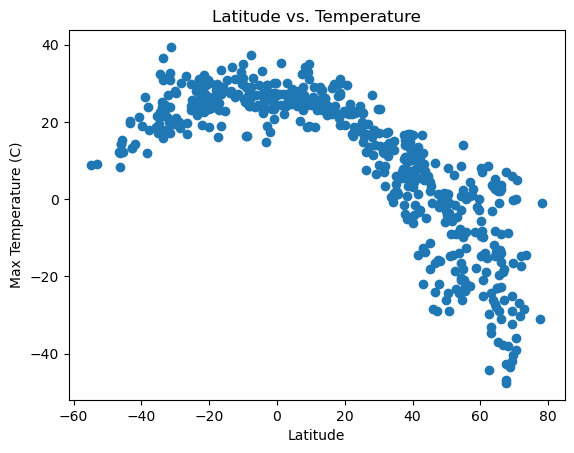

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    label = "Cities"
)
# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

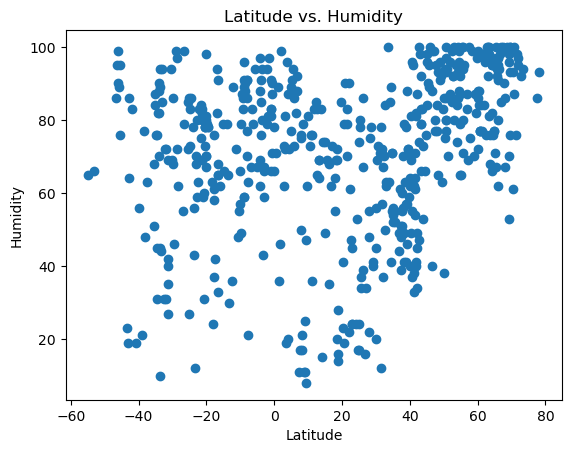

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"]
)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

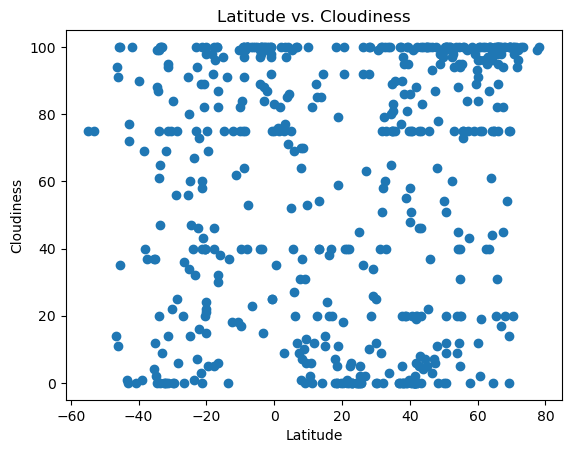

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"]
)
# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

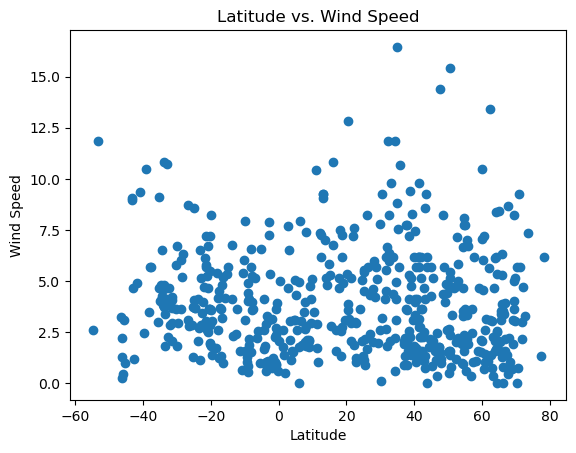

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"]
)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    
    plt.show()

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iroquois falls,48.7669,-80.6831,1.04,96,95,5.66,CA,1676396007
1,toora-khem,52.4675,96.1100,-18.70,99,97,1.17,RU,1676396007
2,bathsheba,13.2167,-59.5167,28.34,69,40,9.26,BB,1676396008
3,husavik,66.0449,-17.3389,2.64,80,100,3.85,IS,1676396008
4,albany,42.6001,-73.9662,8.69,47,5,2.24,US,1676396008


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,kieta,-6.2167,155.6333,26.91,79,100,2.56,PG,1676396008
6,hithadhoo,-0.6000,73.0833,27.38,71,25,3.91,MV,1676396008
9,maragogi,-9.0122,-35.2225,29.05,59,100,4.41,BR,1676396008
10,pisco,-13.7000,-76.2167,28.03,65,0,4.12,PE,1676396009
11,olinda,-8.0089,-34.8553,28.85,70,40,5.66,BR,1676396009


###  Temperature vs. Latitude Linear Regression Plot

In [40]:
# Linear regression on Northern Hemisphere
plt.scatter(
    northern_hemi_df["Lat"]
    northern_hemi_df["Max Temp"]
) plot_linear_regression

SyntaxError: invalid syntax (239168341.py, line 4)

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE